# Meta-analysis

In [1]:
R.version.string

[1] "R version 4.3.1 (2023-06-16 ucrt)"

In [2]:
#*
system.file(package = 'tidyverse')
system.file(package = 'meta')
system.file(package = 'metafor')
system.file(package = 'IRkernel') #https://www.practicaldatascience.org/html/jupyter_r_notebooks.html
system.file(package = 'dmetar')
system.file(package = 'netmeta')
system.file(package = 'rgl')
system.file(package = 'readxl')
system.file(package = 'mvtnorm')

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/tidyverse"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/meta"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/metafor"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/IRkernel"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/dmetar"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/netmeta"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/rgl"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/readxl"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/mvtnorm"

### Only if necessary intall some package

In [3]:
#* If necessary
install.packages("tidyverse")

Installing package into 'C:/Users/lucas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lucas\AppData\Local\Temp\Rtmpu4JOua\downloaded_packages


In [33]:
install.packages("mvtnorm")

Installing package into 'C:/Users/lucas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'mvtnorm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lucas\AppData\Local\Temp\RtmpiIwLG6\downloaded_packages


## Import Libraries

In [3]:
#* Import packages
library(dmetar)
library(netmeta)
library(rgl)
library(readxl) #* read excel files
library(mvtnorm)

Extensive documentation for the dmetar package can be found at: 
 www.bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/

Carregando pacotes exigidos: meta

Loading 'meta' package (version 6.5-0).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs

Loading 'netmeta' package (version 2.8-2).
Type 'help("netmeta-package")' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'netmeta' package: https://tinyurl.com/kyz6wjbb



### Dataset

In [4]:
#* Loads specified data sets, or list the available data sets.
vomiting.ds <- read_excel("G:/Meu Drive/Projetos/Gabriella Projetos/Meta-análise/testes/planilha_01_vomiting.xlsx")

In [5]:
vomiting.ds

StudyId,Author,EXPERIMENT,CONTROL,EE,NE,EC,NC,or
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Rachman 2021,treat_1,treat_3,1,378,0,123,NA
2,Sivapalan 2022,treat_3,treat_4,2,61,2,56,NA
4,Jonhston 2021,treat_2,treat_3,1,71,3,77,NA
4,Jonhston 2021,treat_2,treat_4,1,71,2,83,NA
4,Jonhston 2021,treat_3,treat_4,3,77,2,83,NA
5,Cavalcanti 2020,treat_2,treat_3,0,221,0,217,NA
6,Ghanei 2021,treat_2,treat_3,3,110,0,105,NA


In [6]:
p2 <- pairwise(list(EXPERIMENT, CONTROL), list(EE, EC), list(NE, NC), data = vomiting.ds)

In [7]:
head(p2, n = 20)

,TE,seTE,studlab,treat1,treat2,event1,n1,event2,n2,incr,allstudies,StudyId,Author,EXPERIMENT,CONTROL,EE,NE,EC,NC,or
,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,-0.02136263,1.6297017,1,treat_1,treat_3,1,378,0,123,0.5,FALSE,1,Rachman 2021,treat_1,treat_3,1,378,0,123,NA
2,-0.08552217,0.9827255,2,treat_3,treat_4,2,61,2,56,0.0,FALSE,2,Sivapalan 2022,treat_3,treat_4,2,61,2,56,NA
3,-1.01748674,1.1429181,3,treat_2,treat_3,1,71,3,77,0.0,FALSE,4,Jonhston 2021,treat_2,treat_3,1,71,3,77,NA
4,-0.53698645,1.2140294,4,treat_2,treat_4,1,71,2,83,0.0,FALSE,4,Jonhston 2021,treat_2,treat_4,1,71,2,83,NA
5,0.48050029,0.8990540,5,treat_3,treat_4,3,77,2,83,0.0,FALSE,4,Jonhston 2021,treat_3,treat_4,3,77,2,83,NA
6,NA,NA,6,treat_2,treat_3,0,221,0,217,0.5,FALSE,5,Cavalcanti 2020,treat_2,treat_3,0,221,0,217,NA
7,1.89960558,1.5057177,7,treat_2,treat_3,3,110,0,105,0.5,FALSE,6,Ghanei 2021,treat_2,treat_3,3,110,0,105,NA


In [8]:
netgraph.p2 <- netconnection(p2)
netgraph.p2

Number of studies: k = 7
Number of pairwise comparisons: m = 7
Number of treatments: n = 4
Number of designs: d = 4
Number of subnetworks: 1

In [9]:
netgraph.p2 <- netmetabin(p2)

Warning message:
"Study '6' without any events excluded from network meta-analysis."
Warning message:
"Treatment arm 'treat_3' without events in design 'treat_1:treat_3' excluded from network meta-analysis."
Warning message:
"Design 'treat_1:treat_3' with single treatment arm excluded from network meta-analysis."


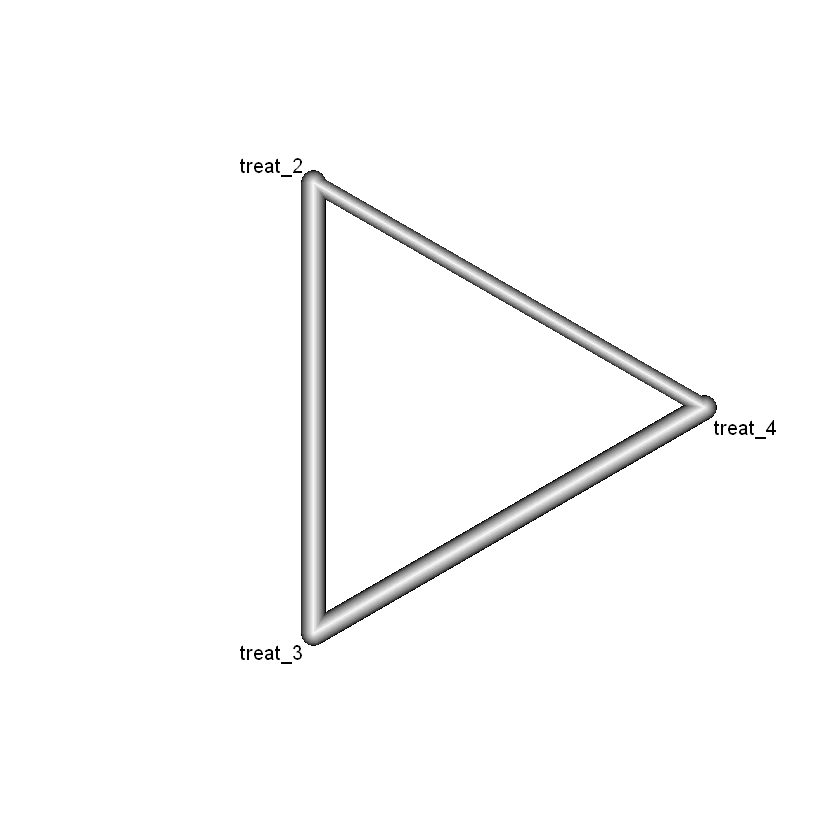

In [10]:
netgraph(netgraph.p2)

In [12]:
#* Apply meta function
p.netmeta <- netmeta(
    TE = TE,
    seTE = seTE,
    treat1 = treat1,
    treat2 = treat2,
    studlab = Author,
    data = p2,
    sm = "RR",
    comb.fixed = FALSE,
    comb.random = TRUE,
    # reference.group = "treat_2",
    details.chkmultiarm = TRUE,
    sep.trts = " vs "
)

Warning message:
"Comparison with missing TE / seTE or zero seTE not considered in network meta-analysis."


Comparison not considered in network meta-analysis:
         studlab  treat1  treat2 TE seTE
 Cavalcanti 2020 treat_2 treat_3 NA   NA



In [13]:
print(as.matrix(table(vomiting.ds$Author)))

                [,1]
Cavalcanti 2020    1
Ghanei 2021        1
Jonhston 2021      3
Rachman 2021       1
Sivapalan 2022     1


In [14]:
p.netmeta

Number of studies: k = 4
Number of pairwise comparisons: m = 6
Number of treatments: n = 4
Number of designs: d = 4

Random effects model

Treatment estimate (sm = 'RR', comparison: other treatments vs 'treat_1'):
            RR            95%-CI     z p-value
treat_1      .                 .     .       .
treat_2 1.1625 [0.0248; 54.4009]  0.08  0.9388
treat_3 1.0216 [0.0359; 29.0460]  0.01  0.9900
treat_4 0.9735 [0.0252; 37.5727] -0.01  0.9885

Quantifying heterogeneity / inconsistency:
tau^2 = 0.2612; tau = 0.5110; I^2 = 17.8% [0.0%; 91.5%]

Tests of heterogeneity (within designs) and inconsistency (between designs):
                   Q d.f. p-value
Total           2.43    2  0.2961
Within designs  0.00    0      --
Between designs 2.43    2  0.2961

In [15]:
decomp.design(p.netmeta)

Q statistics to assess homogeneity / consistency

                   Q df p-value
Total           2.43  2  0.2961
Within designs  0.00  0      --
Between designs 2.43  2  0.2961

Between-designs Q statistic after detaching of single designs
(influential designs have p-value markedly different from 0.2961)

               Detached design    Q df p-value
            treat_2 vs treat_3 0.18  1  0.6709
            treat_3 vs treat_4 2.38  1  0.1228
 treat_2 vs treat_3 vs treat_4 0.00  0      --

Q statistic to assess consistency under the assumption of
a full design-by-treatment interaction random effects model

                   Q df p-value tau.within tau2.within
Between designs 2.43  2  0.2961          0           0

In [49]:
#* studies labels
p.netmeta$trts

[1] "treat_1" "treat_2" "treat_3" "treat_4"

In [32]:
#* exchange short labels for long labels
long.labels <- c(
    "Care As Usual", 
    "Group",
    "Guided Self-Help",
    "Individual", 
    "Telephone",
    "Unguided Self-Help",
    "Waitlist"
)
long.labels

[1] "Care As Usual"      "Group"              "Guided Self-Help"  
[4] "Individual"         "Telephone"          "Unguided Self-Help"
[7] "Waitlist"

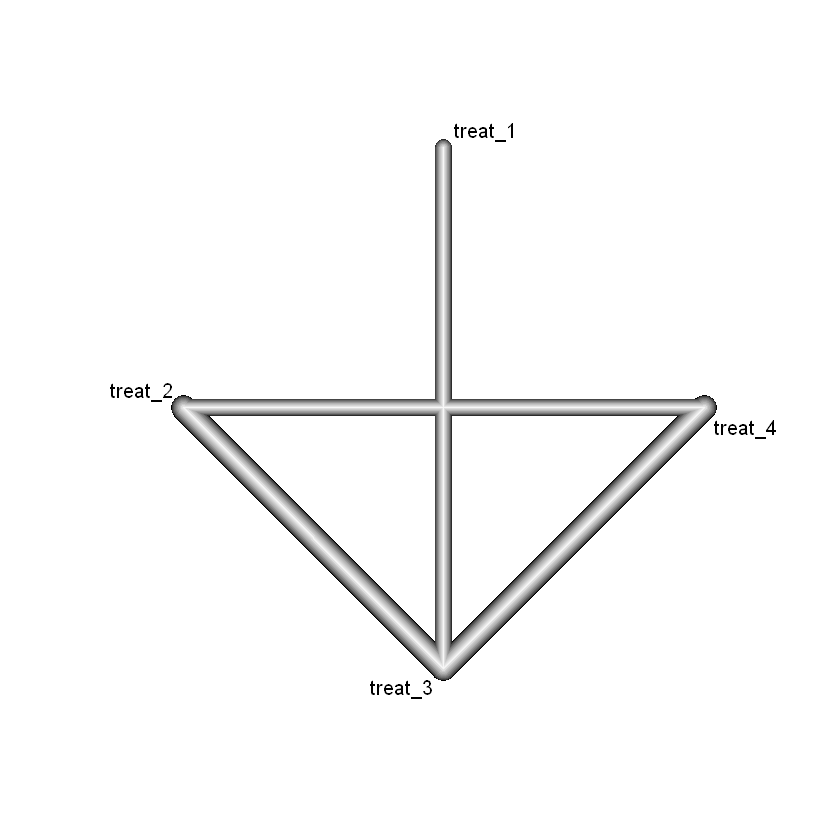

In [16]:
#* plot netgraph
netgraph(p.netmeta)

### 3D Graph

In [17]:
#* plot 3d graph
#* It's possible some errors to renderer the 3D plot inside jupyter
netgraph(
    m.netmeta,
    labels = long.labels,
    dim = "3d"
)

ERROR: Error in eval(expr, envir, enclos): objeto 'm.netmeta' não encontrado


Direct Evidence Proportion for each Network Estimate 
 ------------------------------------------------- 
                   Direct Indirect meanpath   minpar
treat_1 vs treat_3 1.0000   0.0000 1.000000 1.000000
treat_3 vs treat_4 0.9803   0.0197 1.049604 1.807228
treat_2 vs treat_3 0.9714   0.0286 1.116451 1.550646
treat_2 vs treat_4 0.6863   0.3137 1.330216 1.439891
treat_1 vs treat_2 0.0000   1.0000 2.116451 1.000000
treat_1 vs treat_4 0.0000   1.0000 2.049604 1.000000

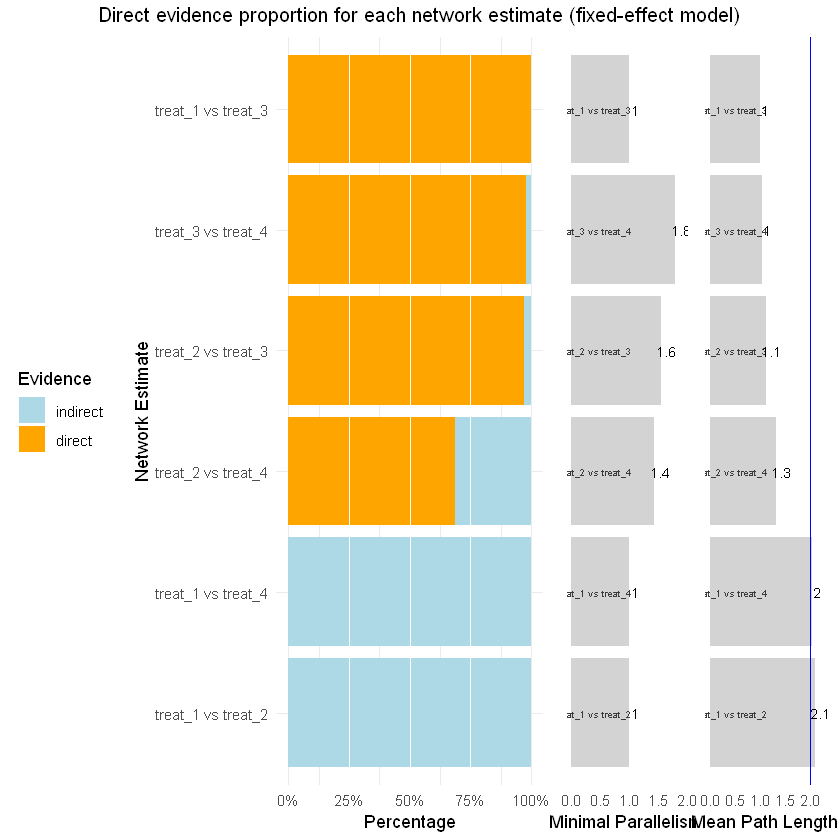

In [18]:
direct.evidence.plot(p.netmeta)

In [19]:
result.matrix <- p.netmeta$TE.fixed
result.matrix <- round(result.matrix, 2)
result.matrix[lower.tri(result.matrix, diag = FALSE)] <- NA
result.matrix

,treat_1,treat_2,treat_3,treat_4
treat_1,0,-0.11,-0.02,0.06
treat_2,NA,0.00,0.08,0.17
treat_3,NA,NA,0.00,0.08
treat_4,NA,NA,NA,0.00


In [20]:
netleague(
    p.netmeta,
    bracket = "(",
    digits=2
)

League table (random effects model):
                                                                            
            treat_1                  . 0.98 (0.03; 27.83)                  .
 0.86 (0.02; 40.26)            treat_2 1.10 (0.16;  7.59) 0.58 (0.04;  7.73)
 0.98 (0.03; 27.83) 1.14 (0.17;  7.56)            treat_3 1.24 (0.28;  5.47)
 1.03 (0.03; 39.64) 1.19 (0.14; 10.09) 1.05 (0.24;  4.53)            treat_4

### Save the league$fixed in a csv file

In [38]:
#* save netleague in a csv file
# write.csv(netleague$fixed, "netleague.csv")

### Effect size rank

In [21]:
netrank(p.netmeta, small.values = "good", method="SUCRA")

         SUCRA
treat_4 0.5307
treat_1 0.5160
treat_3 0.5033
treat_2 0.4500

- based on 1000 simulations

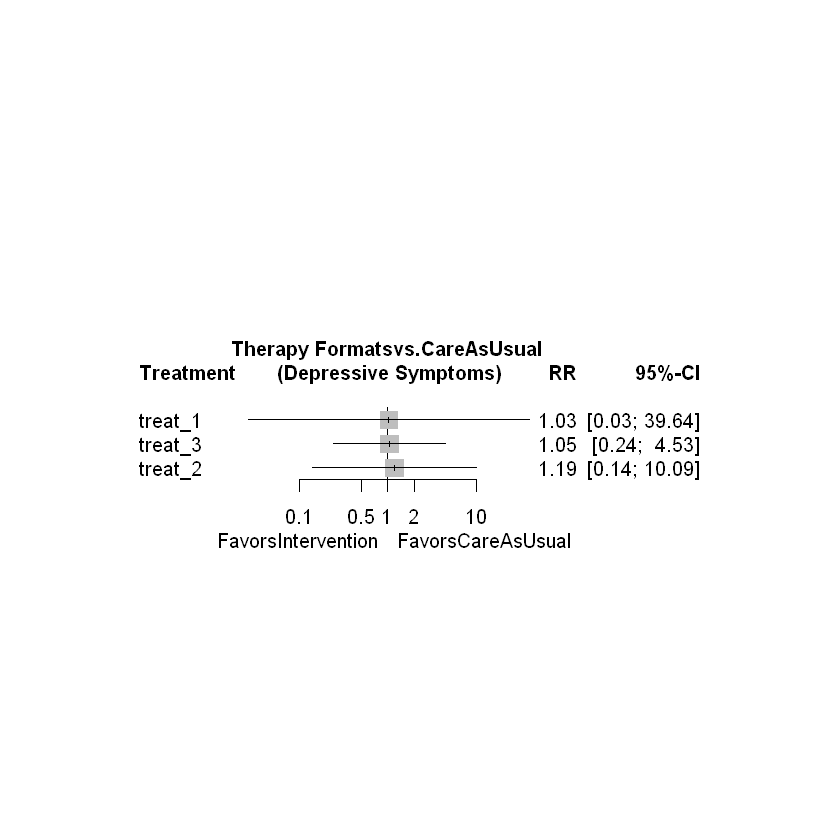

In [23]:
forest(
    p.netmeta,
    reference.group ="treat_4",
    sortvar = TE,
    # xlim =c(0, 0.5),
    smlab =paste("Therapy Formatsvs.CareAsUsual\n",
    "(Depressive Symptoms)"),
    drop.reference.group = TRUE,
    label.left ="FavorsIntervention",
    label.right ="FavorsCareAsUsual",
    # labels = long.labels
)

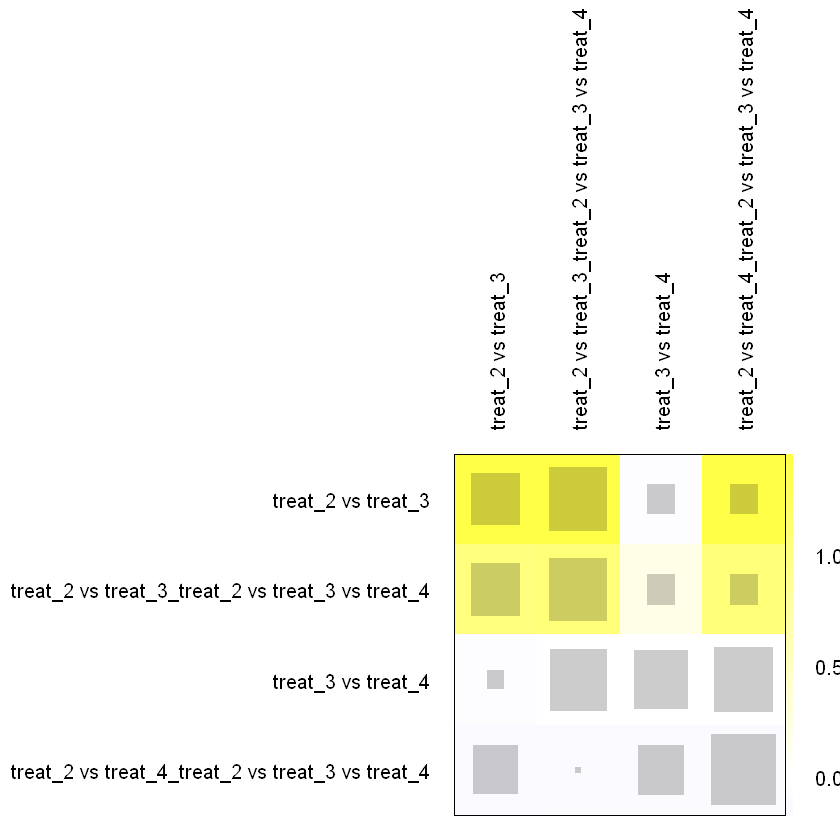

In [26]:
netheat(p.netmeta)

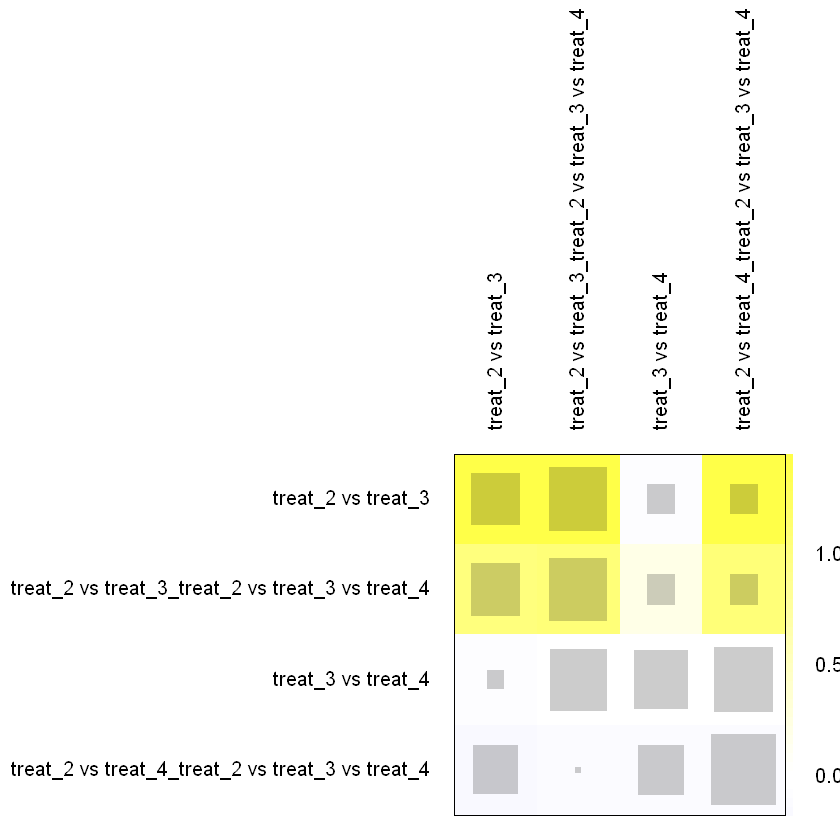

In [27]:
#* random plot
netheat(p.netmeta, random = TRUE)

In [28]:
#* fixed
netsplit(p.netmeta)

Separate indirect from direct evidence (SIDE) using back-calculation method

Random effects model: 

         comparison k prop     nma  direct  indir.    Diff     z p-value
 treat_2 vs treat_1 0    0  0.1506       .  0.1506       .     .       .
 treat_3 vs treat_1 1 1.00  0.0214  0.0214       .       .     .       .
 treat_4 vs treat_1 0    0 -0.0268       . -0.0268       .     .       .
 treat_2 vs treat_3 2 0.96  0.1292  0.0989  0.9500 -0.8511 -0.16  0.8702
 treat_2 vs treat_4 1 0.68  0.1774 -0.5370  1.7205 -2.2575 -0.96  0.3350
 treat_3 vs treat_4 2 0.97  0.0482  0.2169 -6.4379  6.6548  1.40  0.1610

Legend:
 comparison - Treatment comparison
 k          - Number of studies providing direct evidence
 prop       - Direct evidence proportion
 nma        - Estimated treatment effect ( RR ) in network meta-analysis
 direct     - Estimated treatment effect ( RR ) derived from direct evidence
 indir.     - Estimated treatment effect ( RR ) derived from indirect evidence
 Diff       - Di

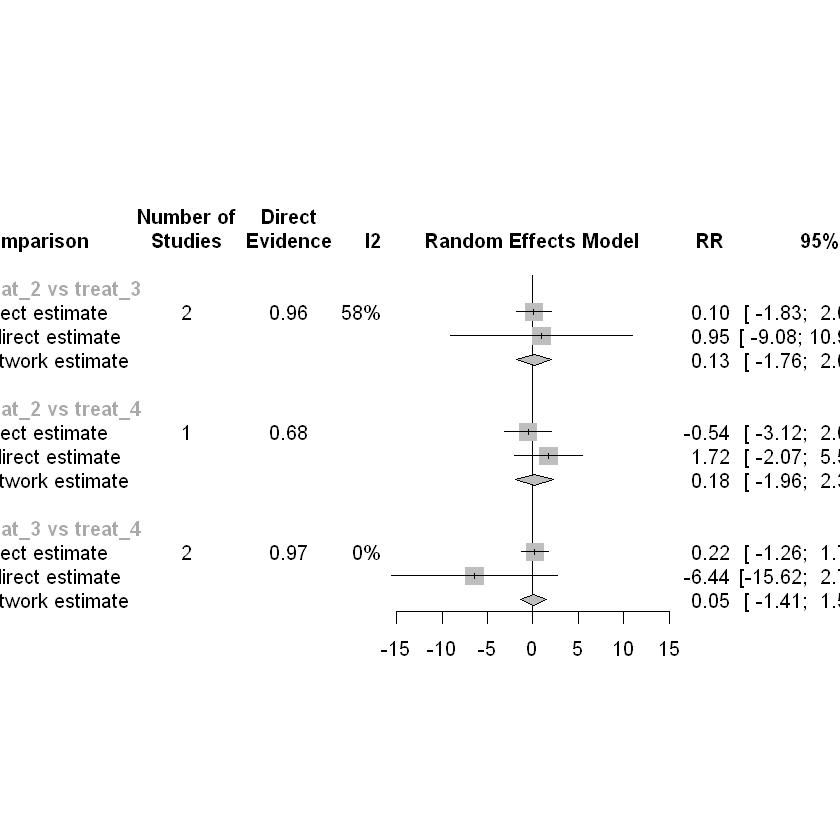

In [29]:
netsplit(p.netmeta) %>% forest()

In [30]:
funnel(
    p.netmeta,
    order =c("wlc", "cau", "ind", "grp", "tel", "ush", "gsh"), # from old to new - verify the hypothesis that new studies was favored
    pch =c(1:4, 5, 6, 8, 15:19, 21:24),
    col =c("blue", "red", "purple", "forestgreen", "grey", "green", "black", "brown", "orange", "pink", "khaki", "plum", "aquamarine", "sandybrown", "coral", "gold4"),
    linreg = TRUE # Egger's test - p-value
)

ERROR: Error: Argument 'order' must be "treat_1", "treat_2", "treat_3", or "treat_4".
